##***BIKE SHARE ANALYSIS***

##***PROJECT 1:***

##***SUBMITTED BY Selvakrishnan R***

#***IMPORT PYTHON PACKAGES***


In [ ]:
import pandas as pd # pandas for data manipulation and processing
import numpy as np
%matplotlib inline
import seaborn as sns # seaborn for visualizations

#***DATA EXPLORATION AND INSIGHTS***

# 1. Any particular bikes which were used a lot?


> My definition of particular bikes which used a lot is a follows.
- This block helps to identify the top 5 specific bikes which were used most  often with bike_number and with maximum count of no of trips count which these bikes went far.
- By having the list of specific bike_number which done maximum trips it helps us to identify the bike condition whether it operates in a good manner or do we need to replace the most rided bike with new one or do we need perform the complete bike health checkup. In order to reduce the risks of bike failure in a trip. 
- So by getting the list of most used bikes it helps us to replace the most used bike with new bike or bike health service can be done for most used bikes which will be helpful in reducing the accident or Bike Failure.



In [ ]:
%%bigquery --project fresh-electron-305718 particular_bikes
SELECT bike_number,Count(*) AS trip_count FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY
  bike_number
HAVING
  bike_number is NOT Null
ORDER BY
  trip_count DESC
  LIMIT 5

In [ ]:
particular_bikes.filter(["bike_number", "trip_count"]).head()


,bike_number,trip_count
0,389,2872
1,524,2853
2,392,2853
3,503,2845
4,328,2827


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Trips Count'),
 Text(0.5, 0, 'Bike Number'),
 Text(0.5, 1.0, 'Top 5 Particular Bikes which used the Most')]

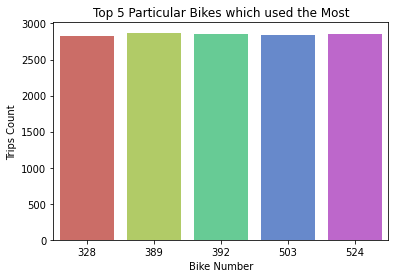

In [ ]:
ax = sns.barplot(particular_bikes["bike_number"],particular_bikes["trip_count"],palette = 'hls',color = 'tab:purple')
ax.set(xlabel = "Bike Number", ylabel = "Trips Count", title = "Top 5 Particular Bikes which used the Most")

#2. Did the bike_number = "389" frequently start a ride from a particular station?

The below analysis helps us to find the frequent start ride for a specific bike number in a particular locations is as follows.
- There might be a case you would like to find a specific bike which frequently starts in a specific location.
- There might be some people who regularly like to ride the same vehicle in the same station. So this analysis helps us to identify the frequent start ride from a particular location for a specific Bike.


In [ ]:
%%bigquery --project fresh-electron-305718 particular_location
SELECT
  start_station_id, 
  SUM(CASE
      WHEN bike_number = 389 THEN 1
  END
    ) AS bike_number_389,
FROM
  `bigquery-public-data.san_francisco.bikeshare_trips`
where bike_number = 389
GROUP BY start_station_id
ORDER BY bike_number_389 DESC
LIMIT 5


In [ ]:
particular_location.filter(["start_station_id", "bike_number_389"]).head()

,start_station_id,bike_number_389
0,70,254
1,69,179
2,50,153
3,60,150
4,61,135


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Start Station ID'),
 Text(0.5, 0, 'Bike Number 389 Count used in Each Station'),
 Text(0.5, 1.0, 'Frequently Used Bikes in a Particular Location')]

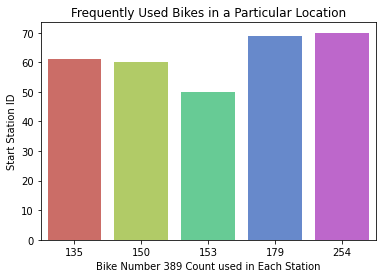

In [ ]:
ax = sns.barplot(particular_location["bike_number_389"],particular_location["start_station_id"],palette = 'hls',color = 'tab:purple')
ax.set(xlabel = "Bike Number 389 Count used in Each Station", ylabel = "Start Station ID", title = "Frequently Used Bikes in a Particular Location")

# 3. What are some popular routes?



>My definition for some popular routes is as follows.
- By listing the popular routes we can able to increase the Customers by providing the bikes in those specific stations with an discount offers.
- This analysis will give us a best profit.



In [ ]:
%%bigquery --project fresh-electron-305718 popular_routes
SELECT
  start_station_id,
  end_station_id,
  COUNT(*) AS Trips_on_route
FROM
  `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE
  (start_station_id != end_station_id) 
GROUP BY
  start_station_id,
  end_station_id
ORDER BY
  Trips_on_route DESC
LIMIT
  5


In [ ]:
popular_routes.filter(["start_station_id", "end_station_id","Trips_on_route"]).head()

,start_station_id,end_station_id,Trips_on_route
0,50,60,9150
1,69,65,8508
2,61,50,7620
3,50,61,6888
4,60,74,6874


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Total Trips Count on Specifc Station'),
 Text(0.5, 0, 'Start Station ID'),
 Text(0.5, 1.0, 'Most Popular Routes')]

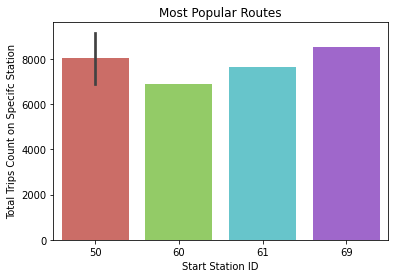

In [ ]:
ax = sns.barplot(popular_routes["start_station_id"],popular_routes["Trips_on_route"],palette = 'hls',color = 'tab:purple')
ax.set(xlabel = "Start Station ID", ylabel = "Total Trips Count on Specifc Station", title = "Most Popular Routes")

# 4. Filter out the bike trips which are  60 minutes or more?



> The below analysis helps us to find out the bike trips which are 60 Minutes or More.
- It helps us to find the subscriber type (i.e., Customer or Subscriber) who is riding the vehicle for 60 minutes or more than 60 minutes.
- Here we can able to analyse whether already subscribed customer is driving more than 60 minutes, or new customers driving the vechicle for more than 60 minutes. Here new customer wins.
- From the below analysis we can able to understand new customers are riding the vehicle for 60 mintues or more than 60 minutes.




In [ ]:
%%bigquery --project fresh-electron-305718 bike_trips
SELECT
  subscriber_type,
  start_date,
  duration_sec
FROM
  `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE
  duration_sec >= 3600
LIMIT
 5


In [ ]:
bike_trips.filter(["subscriber_type", "start_date","duration_sec"]).head()

,subscriber_type,start_date,duration_sec
0,Customer,2015-10-25 18:12:00+00:00,5957
1,Customer,2015-10-25 18:13:00+00:00,5913
2,Customer,2016-03-18 10:33:00+00:00,6079
3,Customer,2015-12-06 10:52:00+00:00,5780
4,Customer,2016-03-18 10:33:00+00:00,6032


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, ''),
 Text(0.5, 0, 'Duration in Sec'),
 Text(0.5, 1.0, 'Bike Trips which are 60 Mins or More than 60 Mins')]

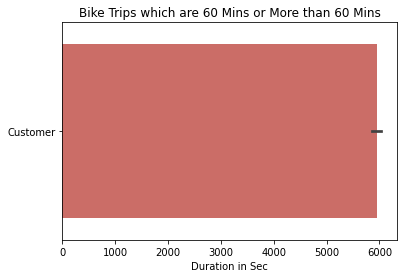

In [ ]:
ax = sns.barplot(bike_trips["duration_sec"],bike_trips["subscriber_type"],palette = 'hls',color = 'tab:purple')
ax.set(xlabel = "Duration in Sec", ylabel = "", title = "Bike Trips which are 60 Mins or More than 60 Mins")

# 5. Do unregistered users take longer or shorter trips?



> The below analysis helps us to find does unregistered users take longer or shorter trips.
- By performing the average duration for the subscriber type, we can able to understand that unregistered users (i.e., Customer) is taking longer trips than subscriber.



In [ ]:
%%bigquery --project fresh-electron-305718 unregistered_users
SELECT
  subscriber_type,
  AVG(duration_sec)/60 AS Average_Duration
FROM
  `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips`
GROUP BY
  Subscriber_type
  LIMIT
  5


In [ ]:
unregistered_users.filter(["subscriber_type", "Average_Duration"]).head()

,subscriber_type,Average_Duration
0,Subscriber,10.470441
1,Customer,49.978509


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, ''),
 Text(0.5, 0, 'AVG Duration in Sec'),
 Text(0.5, 1.0, 'Do unregistered users take longer or shorter trips')]

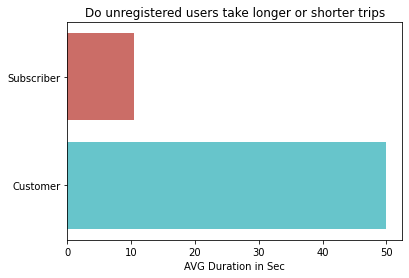

In [ ]:
ax = sns.barplot(unregistered_users["Average_Duration"],unregistered_users["subscriber_type"],palette = 'hls',color = 'tab:purple')
ax.set(xlabel = "AVG Duration in Sec", ylabel = "", title = "Do unregistered users take longer or shorter trips")